# 1. Library Import & Drive Mount

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 나눔고딕 폰트 설치(런타임 재시작 필요!)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use(['ggplot'])

plt.rc('font', family='NanumBarunGothic') # 나눔고딕 폰트 설정
plt.rcParams['font.size'] = 20

# 2. 모델 비교

In [61]:
!ls -l '/content/drive/My Drive/Project_CCTV/datasets/comparison.xlsx'

-rw------- 1 root root 9672 Apr 23 07:19 '/content/drive/My Drive/Project_CCTV/datasets/comparison.xlsx'


In [62]:
df = pd.read_excel('/content/drive/My Drive/Project_CCTV/datasets/comparison.xlsx')

In [70]:
df = df.iloc[:6,:3]
df

,model,Loss,Accuracy
0,Conv2D + GRU,1.01580,0.58400
2,Conv2D + LSTM,1.17640,0.50800
4,SlowFast(Dropout High),1.43994,0.42599
1,MobileNet + GRU,1.54900,0.48800
3,VGG16 + LSTM,2.58600,0.59200
5,SlowFast(Dropout Low),3.63340,0.50999


In [71]:
df = df.sort_values(by='Accuracy', ascending=False)

In [72]:
color = {'Conv2D + GRU':'C0', 'Conv2D + LSTM':'C1', 'SlowFast(Dropout High)':'C2', 'MobileNet + GRU':'C3', 'VGG16 + LSTM':'C4', 'SlowFast(Dropout Low)':'C5'}

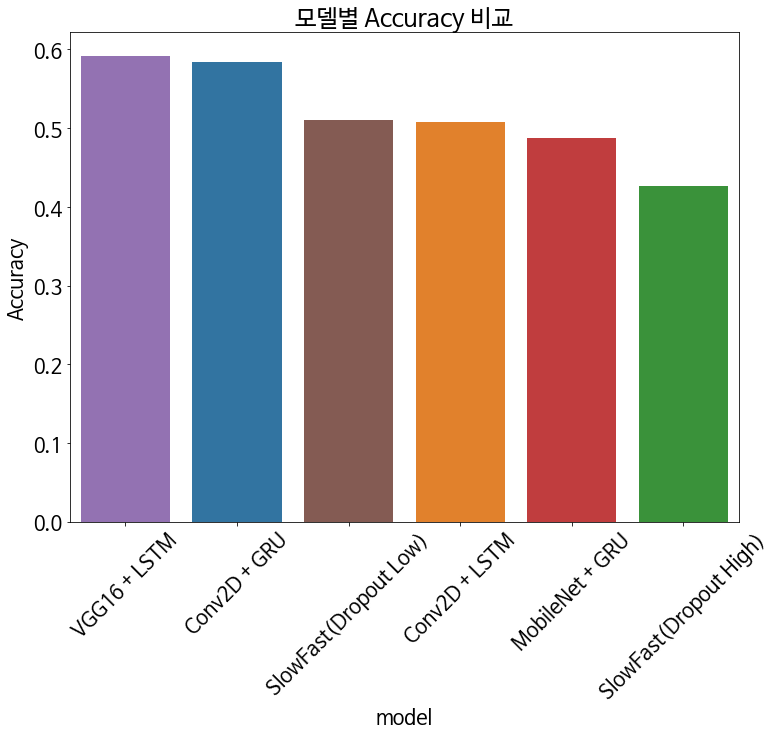

In [73]:
plt.figure(figsize=(12,9))

sns.barplot(x='model', y='Accuracy', data=df, palette=color)
plt.title('모델별 Accuracy 비교')
plt.xticks(rotation=45)

plt.show()

In [74]:
df = df.sort_values(by='Loss', ascending=True)

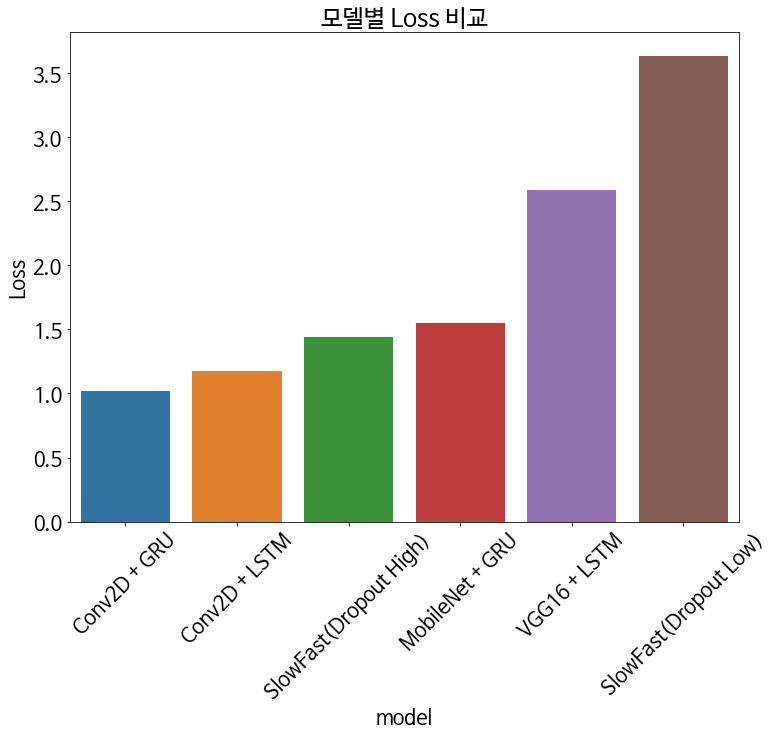

In [75]:
plt.figure(figsize=(12,9))

sns.barplot(x='model', y='Loss', data=df, palette=color)
plt.title('모델별 Loss 비교')
plt.xticks(rotation=45)

plt.show()